In [1]:
import tracking.TrajectorySimulator

In [2]:
import PIL.Image
import PIL.ImageDraw
import cv2
import numpy

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd '/home/fmpaezri/repos/coco/PythonAPI/'

/home/fmpaezri/repos/coco/PythonAPI


In [5]:
import pycocotools.coco

In [6]:
cd '/home/fmpaezri/repos/localization-agent/'

/home/fmpaezri/repos/localization-agent


In [7]:
dataDir='/home/datasets/datasets1/mscoco/'
dataType='train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

In [8]:
%time coco = pycocotools.coco.COCO(annFile)

loading annotations into memory...
Done (t=11.39s)
creating index...
index created!
CPU times: user 15.4 s, sys: 929 ms, total: 16.3 s
Wall time: 16.1 s


In [9]:
catIds = coco.getCatIds()
cats = coco.loadCats()
nms=[cat['name'] for cat in cats]

In [10]:
imgIds = coco.getImgIds(catIds=catIds)

In [11]:
len(catIds)

80

In [12]:
len(imgIds)

700

In [13]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
image = PIL.Image.open('%s/%s/%s'%(dataDir,dataType,img['file_name']))

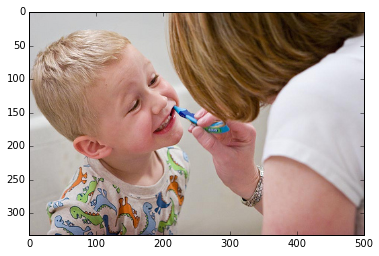

In [14]:
imshow(numpy.asarray(image))

In [77]:
#What means crowd?
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [105]:
reload(tracking.TrajectorySimulator)

<module 'tracking.TrajectorySimulator' from 'tracking/TrajectorySimulator.py'>

In [106]:
aSampler = tracking.TrajectorySimulator.AffineSampler()

In [113]:
bounds = aSampler.polygonBounds(anns[1]['segmentation'][0])

In [109]:
crop = aSampler.segmentCrop(image, anns[1]['segmentation'][0])

Scale: [ 1.63450483  0.90200583]	Angle: -0.556204528279	Translation: [-0.3789813   0.64618225]


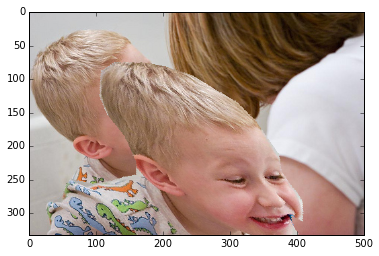

In [145]:
aSampler.sample()
print aSampler
transformed = aSampler.applyTransform(crop)
pasted = aSampler.pasteCrop(image, tuple(bounds[:2]), transformed)
imshow(numpy.asarray(pasted))